In [6]:
import sys
import os
import json
import imp
import datetime
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import HTML
sys.path.append('..')
import pyava
#imp.reload(pyava)
# imp.reload(pyava.parameter_scan_lattice)
#imp.reload(pyava.parameter_scan)
import pyava.parameter_scan_lattice as psc
import pyava.ei_perc_lattice as eip
from pyava.graphio import read_lattice


In [10]:
run_func = psc.run_ei_perc_2d
tstep = 2000
par_list = ['p', 'p_exc']
step_size = 0.05
mesh1 = np.arange(0, 1+step_size, step_size)
mesh2 = np.arange(0, 1+step_size, step_size)
print(mesh1)
print(mesh2)
mesh_list = [mesh1, mesh2]
fixed_par = dict(tstep=tstep, nb_repeats=200)
out_root_dir = '../results'
fmt='%Y-%m-%d-%H-%M-%S'
timestamp = datetime.datetime.now().strftime(fmt)
outdir = os.path.join(out_root_dir, timestamp)
if not os.path.exists(outdir):
    os.mkdir(outdir)
# psc.parameter_scan(par_list, mesh_list, fixed_par, run_func, outdir=outdir, seed=20, parallel=True)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [11]:
out_root_dir = '../results'
#subdir = '2021-07-11-23-17-22_10x10'
subdir = '2021-07-12-00-08-42'
indir = os.path.join(out_root_dir, subdir)


In [8]:
reach_mat, scan_par = psc.get_scan_prop_mat(indir, psc.get_reach)

In [13]:
scan_par

{'par_list': ['p', 'p_exc'],
 'mesh_list': [[0.0,
   0.05,
   0.1,
   0.15000000000000002,
   0.2,
   0.25,
   0.30000000000000004,
   0.35000000000000003,
   0.4,
   0.45,
   0.5,
   0.55,
   0.6000000000000001,
   0.65,
   0.7000000000000001,
   0.75,
   0.8,
   0.8500000000000001,
   0.9,
   0.9500000000000001,
   1.0],
  [0.0,
   0.05,
   0.1,
   0.15000000000000002,
   0.2,
   0.25,
   0.30000000000000004,
   0.35000000000000003,
   0.4,
   0.45,
   0.5,
   0.55,
   0.6000000000000001,
   0.65,
   0.7000000000000001,
   0.75,
   0.8,
   0.8500000000000001,
   0.9,
   0.9500000000000001,
   1.0]],
 'fixed_par': {'tstep': 200, 'nb_repeats': 30},
 'run_func_name': 'run_ei_perc_2d'}

Text(0.5, 0, 'p')

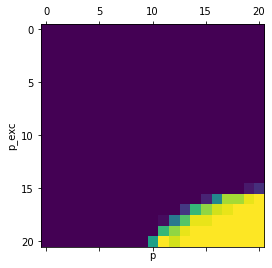

In [12]:
reach_thresh = 90
madeit_mat = reach_mat > reach_thresh
reach_prob_mat = np.sum(madeit_mat, axis=2)/madeit_mat.shape[2]
plt.matshow(reach_prob_mat)
plt.ylabel(par_list[1])
plt.xlabel(par_list[0])

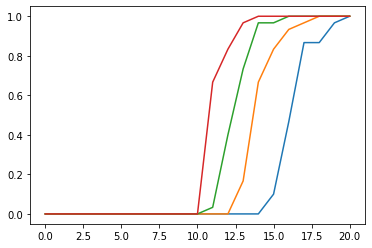

In [204]:
plt.plot(reach_prob_mat[16:20,:].transpose())

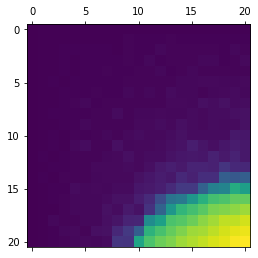

In [152]:
max_reach = np.max(reach_mat, axis=2)
plt.matshow(max_reach)

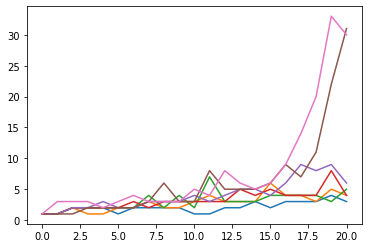

In [153]:
plt.plot(max_reach[:,3:10])

In [50]:
scan_par

{'par_list': ['p', 'p_exc'],
 'mesh_list': [[0.0,
   0.1,
   0.2,
   0.30000000000000004,
   0.4,
   0.5,
   0.6000000000000001,
   0.7000000000000001,
   0.8,
   0.9,
   1.0],
  [0.0,
   0.1,
   0.2,
   0.30000000000000004,
   0.4,
   0.5,
   0.6000000000000001,
   0.7000000000000001,
   0.8,
   0.9,
   1.0]],
 'fixed_par': {'tstep': 30, 'nb_repeats': 200},
 'run_func_name': 'run_ei_perc_2d'}

In [14]:
cluster_size_mat, scan_par = psc.get_cluster_size_mat(indir)

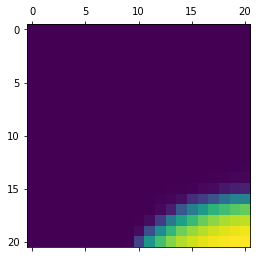

In [15]:
plt.matshow(np.max(cluster_size_mat, axis=2))

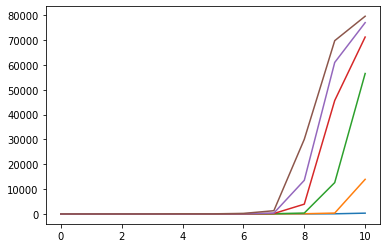

In [9]:
max_sc = np.max(cluster_size_mat, axis=2)
plt.plot(max_sc[:,4:10])

In [34]:
cluster_size_mat = np.array(cluster_size_mat)

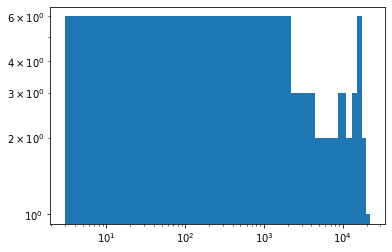

In [202]:
plt.hist(cluster_size_mat[17, 14, :])
plt.xscale('log')
plt.yscale('log')

p: 0.8500000000000001
p_exc: 0.9500000000000001


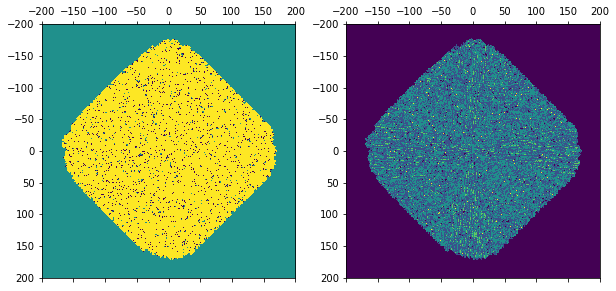

In [21]:
j, k = (17, 19)
print('{}: {}'.format(par_list[0], mesh1[j]))
print('{}: {}'.format(par_list[1], mesh2[k]))
subdir = os.path.join(indir, 'j_{:03d}_k_{:03d}'.format(j, k))
repeat_nb = 29
lat = read_lattice(os.path.join(subdir, '{:03d}.pkl'.format(repeat_nb)))

t = 300
fig, axs = plt.subplots(1, 2, figsize=(10,10))
radius = lat.radius
extent = [-radius, radius, radius, -radius]
axs[0].matshow(np.multiply(lat.node_type_mat, lat.act_time_mat<=t), extent=extent)
im1 = axs[1].matshow(np.multiply(lat.node_latent_state_mat, lat.act_time_mat<=t), extent=extent)
# im1 = axs[1].matshow(lat.node_latent_state_mat)
# im1 = axs[1].matshow(lat.act_time_mat<=t)
#fig.colorbar(im1, ax=axs[1])

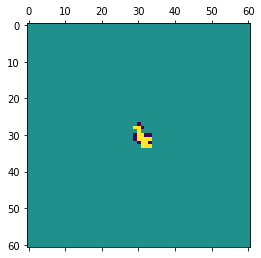